# Homework05

We will examine the data to investigate the email flow of Enrico Marocco's personal email account. There is no right or wrong answer, however, there are wrong ways of examining the data. If you are unsure about how to approach this, feel free to contact me before starting the assignment. Try to adhere to the following principles in your visualizations:

* Make use of any network analysis visualizations
* Do not use more dimensions (color, shape, size, etc.) than you need. Having circles appear both larger and darker due to more divisiveness is redundant.
* Convey only relevant information – think of the message your graphic is meant to present; for each piece of information, ask yourself if the graphic would work equally well without!

In [1]:
%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

personal= pd.read_csv('personal.csv')
#print(personal.head())
G_per_2006=nx.Graph()
G_per_2007=nx.Graph()
G_per_2008=nx.Graph()
G_per_2009=nx.Graph()
G_per_2010=nx.Graph()

years = [G_per_2006, G_per_2007, G_per_2008, G_per_2009, G_per_2010]

for index,row in personal.iterrows():
    if int(row['date'][0:4])==2006:
        G_per_2006.add_edge(row['sender'],row['receiver'])
for index,row in personal.iterrows():
    if int(row['date'][0:4])==2007:
        G_per_2007.add_edge(row['sender'],row['receiver'])
for index,row in personal.iterrows():
    if int(row['date'][0:4])==2008:
        G_per_2008.add_edge(row['sender'],row['receiver'])
for index,row in personal.iterrows():
    if int(row['date'][0:4])==2009:
        G_per_2009.add_edge(row['sender'],row['receiver'])
for index,row in personal.iterrows():
    if int(row['date'][0:4])==2010:
        G_per_2010.add_edge(row['sender'],row['receiver'])

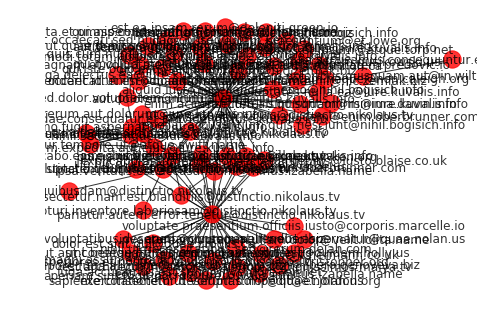

In [2]:
nx.draw(G_per_2006, with_labels=True,alpha=0.8)
plt.show()

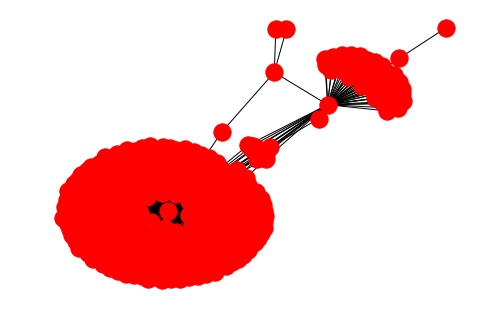

In [5]:
nx.draw(G_per_2007)
plt.show()

[('aut.dolorem.incidunt.eum@iure.kuvalis.info', 0.691358024691358), ('pariatur.autem.error.tenetur@distinctio.nikolaus.tv', 0.4567901234567901), ('nam.expedita.aut.eius@iure.kuvalis.info', 0.14814814814814814), ('rem.nemo.fugit.aspernatur@iure.kuvalis.info', 0.13580246913580246), ('voluptas.placeat.molestias.accusamus@distinctio.nikolaus.tv', 0.12345679012345678), ('pariatur.nihil.sed.cumque@iure.kuvalis.info', 0.12345679012345678), ('explicabo.eos.nobis.asperiores@distinctio.nikolaus.tv', 0.08641975308641975), ('distinctio.qui.quo.et@distinctio.nikolaus.tv', 0.07407407407407407), ('non.aut.voluptatem.ducimus@distinctio.nikolaus.tv', 0.06172839506172839), ('qui.rerum.aut.dolorum@iure.kuvalis.info', 0.06172839506172839)]


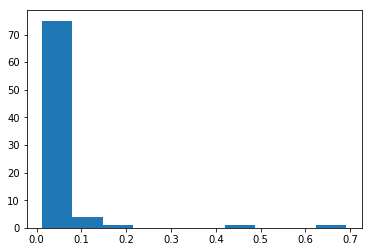

In [4]:
deg_cen_personal = nx.degree_centrality(G_per_2006)
print(sorted(deg_cen_personal.items(), key=lambda x:x[1], reverse=True)[0:10])
plt.hist(list(nx.degree_centrality(G_per_2006).values()))
plt.show()

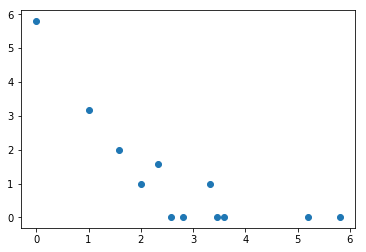

In [6]:
d = {}
for i, j in dict(nx.degree(G_per_2006)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y)
plt.show()

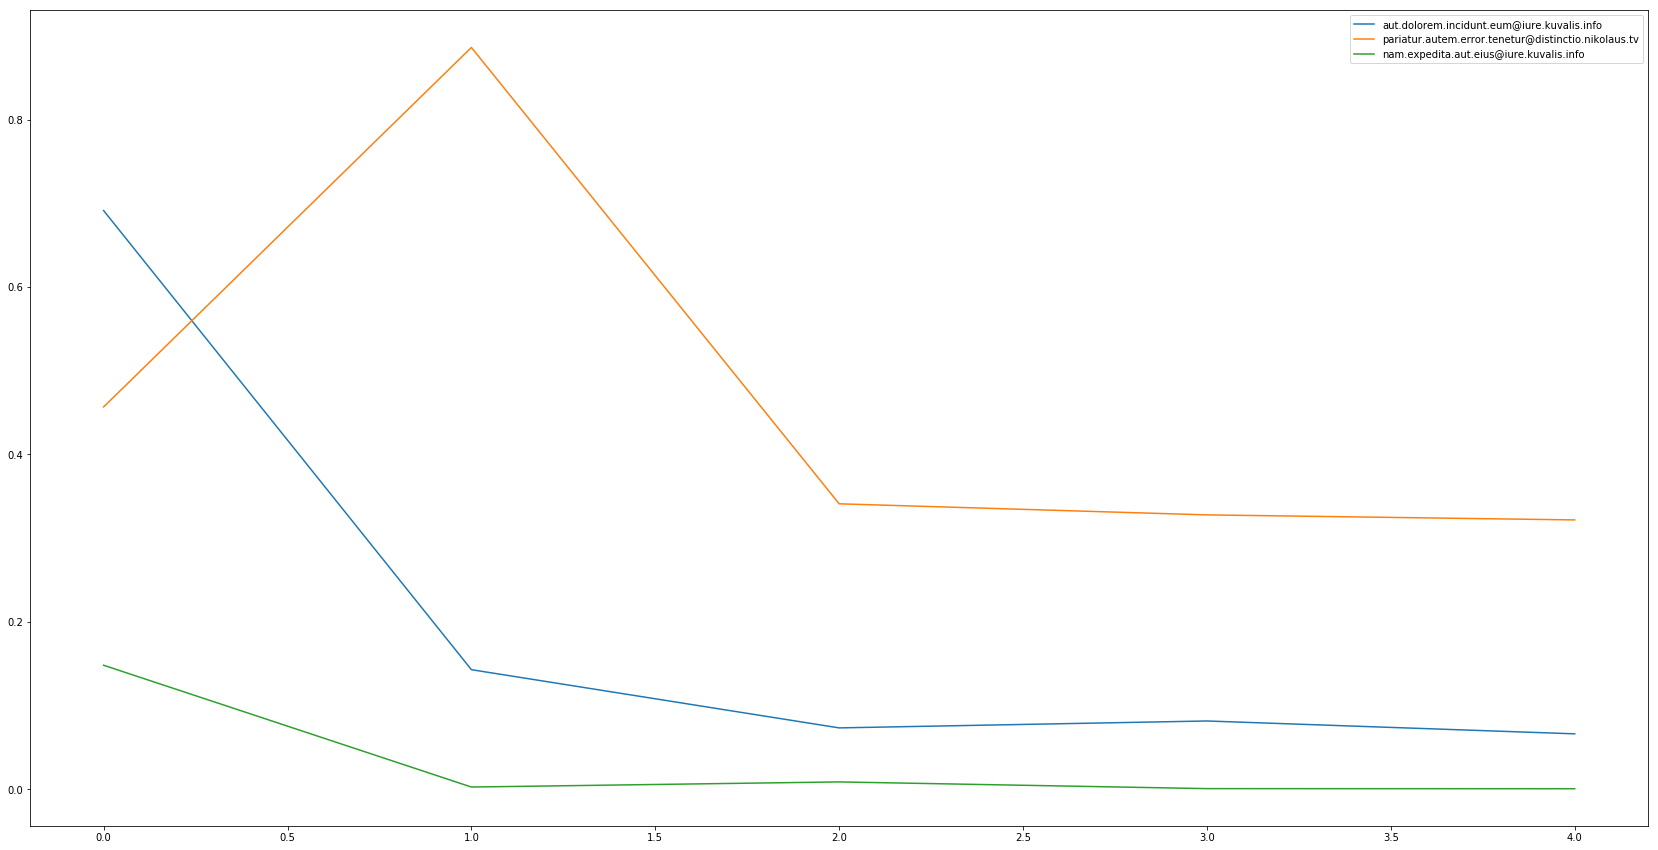

In [9]:
evol = [nx.degree_centrality(year) for year in years]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['aut.dolorem.incidunt.eum@iure.kuvalis.info', 'pariatur.autem.error.tenetur@distinctio.nikolaus.tv', 'nam.expedita.aut.eius@iure.kuvalis.info']].plot(figsize=(29,15))
plt.show()


{'rem.nemo.fugit.aspernatur@iure.kuvalis.info', 'ullam.culpa.dolores.tempore@iure.kuvalis.info', 'pariatur.nihil.sed.cumque@iure.kuvalis.info', 'cum.similique.ipsa.esse@sunt.jarod.biz', 'provident.voluptatibus.sit.voluptate@iure.kuvalis.info', 'et.quibusdam.sed.vel@nihil.bogisich.info', 'aut.dolorem.incidunt.eum@iure.kuvalis.info', 'quisquam.excepturi.inventore.laboriosam@distinctio.nikolaus.tv', 'pariatur.autem.error.tenetur@distinctio.nikolaus.tv', 'consectetur.sint.sunt.omnis@iure.kuvalis.info', 'accusantium.soluta.voluptatem.et@consequuntur.kunze.us', 'at.facilis.commodi.quod@iure.kuvalis.info', 'sit.et.accusamus.distinctio@consequuntur.kunze.us', 'iste.enim.optio.dolorem@iure.kuvalis.info', 'et.aut.reiciendis.dolore@iure.kuvalis.info', 'eius.itaque.velit.quidem@iure.kuvalis.info', 'nam.expedita.aut.eius@iure.kuvalis.info'}


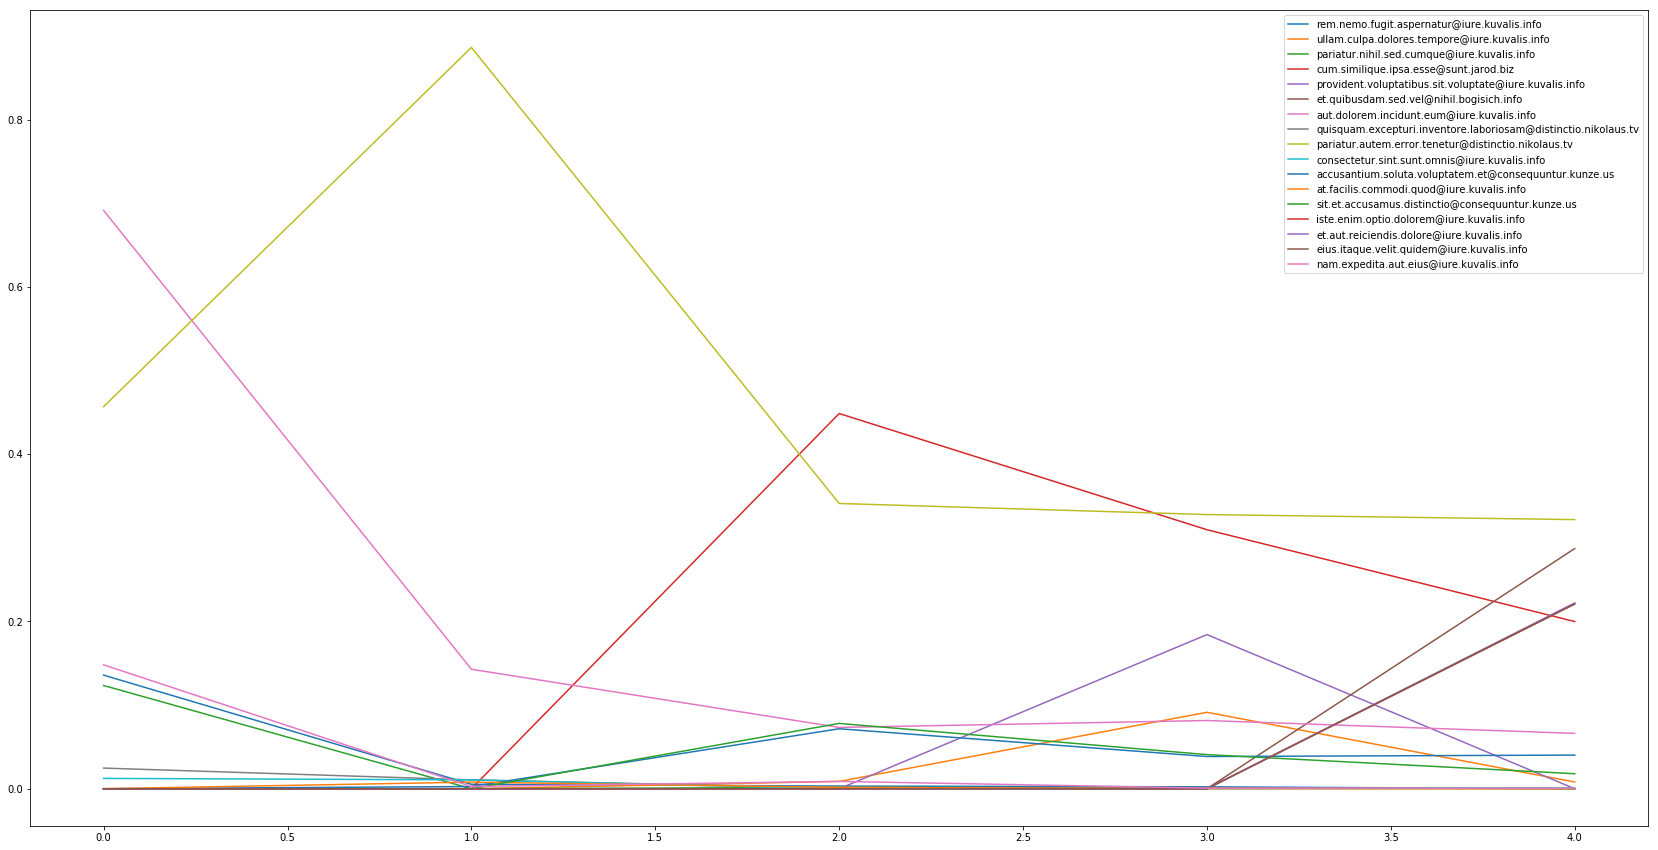

In [10]:
mail = set()
for i in range(5):
    mail |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))
print(mail)

evol_df[list(mail)].plot(figsize=(29,15))
plt.show()